num reads: 17350
lengths reads: 100
k=10: num nodes=47596, num edges=1596200
In Degrees:
degree with max count: 1 count: 12828
Out Degrees:
degree with max count: 1 count: 12906


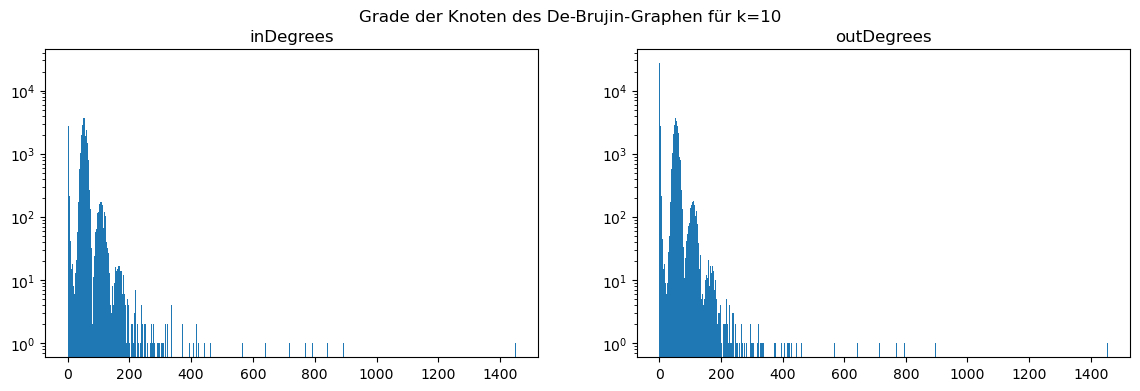

In Degrees: (array([0, 1]), array([ 9025, 47519]))
Out Degrees: (array([0, 1, 2, 3, 4]), array([ 8948, 43790,  3415,   353,    38]))


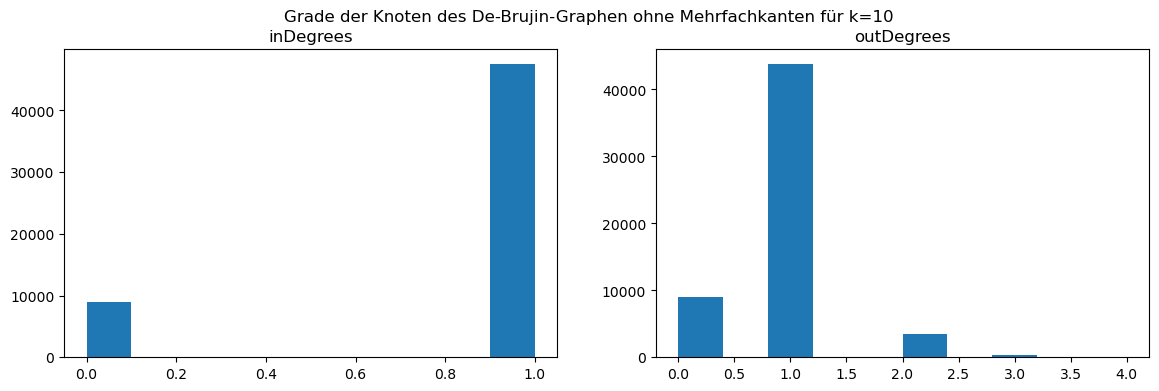

k=20: num nodes=54786, num edges=1422700
In Degrees:
degree with max count: 1 count: 18825
Out Degrees:
degree with max count: 1 count: 18832


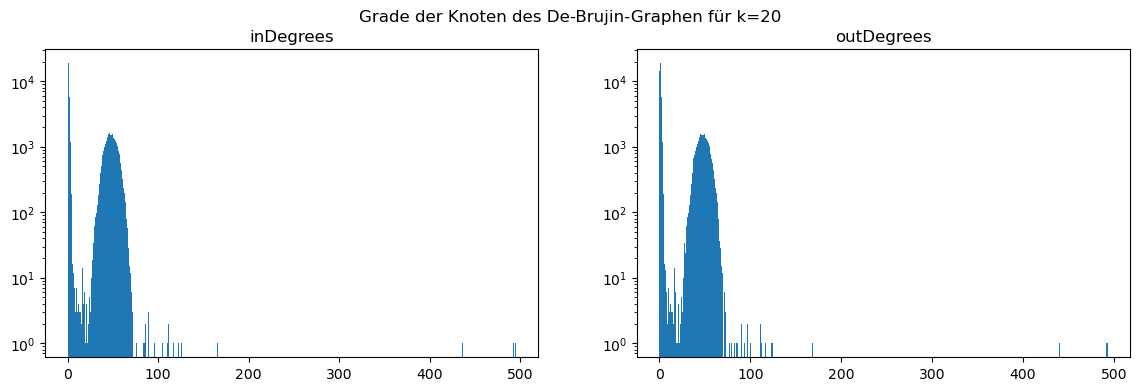

In Degrees: (array([0, 1]), array([14213, 54782]))
Out Degrees: (array([0, 1, 2]), array([14209, 54774,    12]))


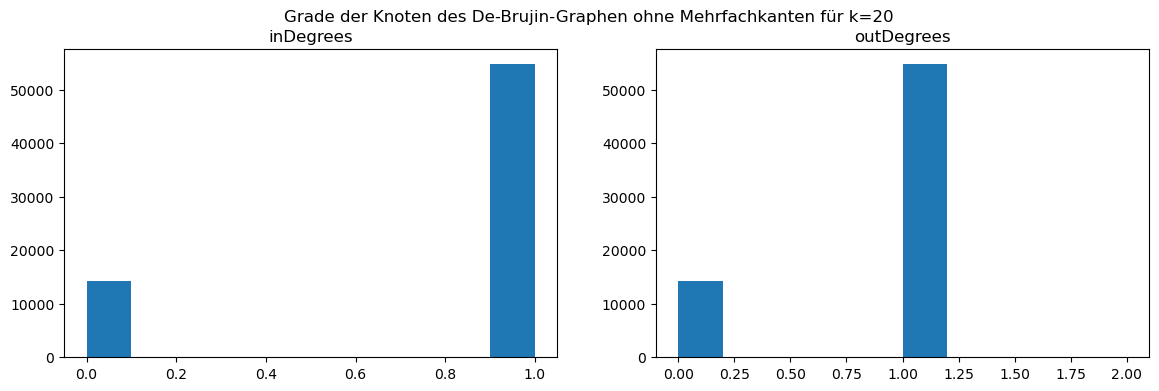

k=30: num nodes=54830, num edges=1249200
In Degrees:
degree with max count: 1 count: 18860
Out Degrees:
degree with max count: 1 count: 18860


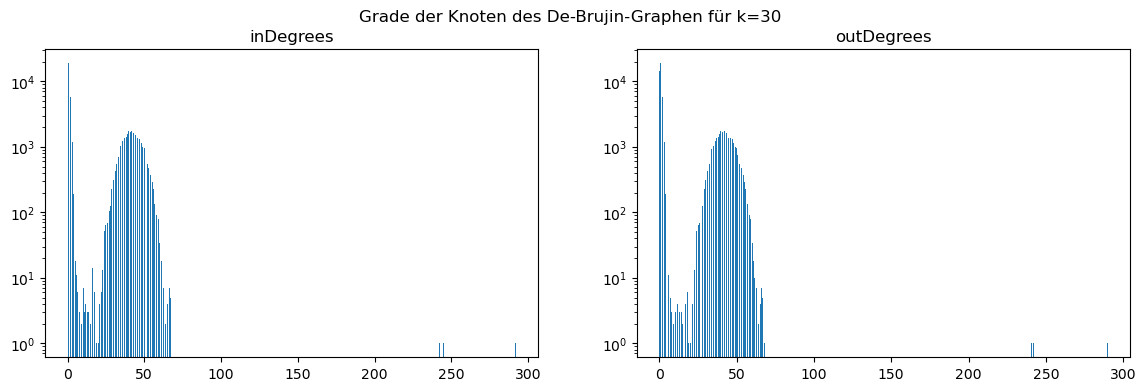

In Degrees: (array([0, 1]), array([14236, 54829]))
Out Degrees: (array([0, 1, 2]), array([14235, 54829,     1]))


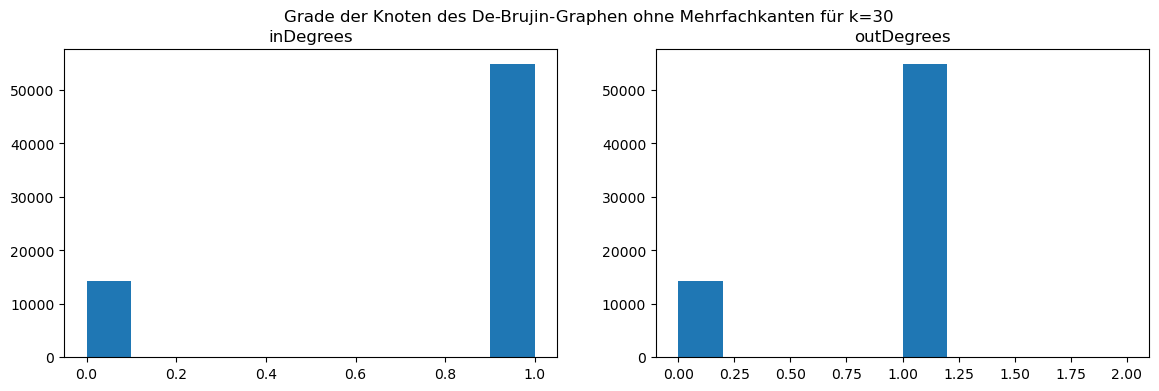

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from src.deBrujinGraphAssembly import DeBrujinGraph
from src.utils import *

fpath = 'reads.fa'

reads = readSequences(fpath)
print(f'num reads: {len(reads)}')
print(f'lengths reads: {len(reads[0])}')

for k in [10,20,30]:
    deBrujinGraph = DeBrujinGraph(reads, k)
    graph = deBrujinGraph.graph
    numNodes = len(graph)
    numEdges = sum([sum(graph[node].values()) for node in graph])
    print(f'k={k}: num nodes={numNodes}, num edges={numEdges}')

    degrees = deBrujinGraph.getDegreesNodes()
    degsList = np.array([degrees[node] for node in degrees])

    print('In Degrees:')
    vals, counts = np.unique(degsList[:,0], return_counts=True)
    print(f'degree with max count: {vals[np.argmax(counts)]} count: {max(counts)}')

    print('Out Degrees:')
    vals, counts = np.unique(degsList[:,1], return_counts=True)
    print(f'degree with max count: {vals[np.argmax(counts)]} count: {max(counts)}')

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14,4)
    fig.suptitle(f'Grade der Knoten des De-Brujin-Graphen für k={k}')    

    ax1.set_title('inDegrees')
    ax1.set_yscale('log')
    ax1.hist(degsList[:,0], bins=500)

    ax2.set_title('outDegrees')
    ax2.set_yscale('log')
    ax2.hist(degsList[:,1], bins=500)

    plt.savefig(f'Plots/hist_nodeDeg_graph_k{k}.png')
    plt.show()



    degrees = deBrujinGraph.getUniqueEdgeDegreesNodes()
    degsList = np.array([degrees[node] for node in degrees])

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14,4)
    fig.suptitle(f'Grade der Knoten des De-Brujin-Graphen ohne Mehrfachkanten für k={k}')    

    ax1.set_title('inDegrees')
    #ax1.set_yscale('log')
    ax1.hist(degsList[:,0])
    print(f'In Degrees: {np.unique(degsList[:,0], return_counts=True)}')

    ax2.set_title('outDegrees')
    #ax2.set_yscale('log')
    ax2.hist(degsList[:,1])
    print(f'Out Degrees: {np.unique(degsList[:,1], return_counts=True)}')

    plt.savefig(f'Plots/hist_uniqueEdgeNodeDeg_graph_k{k}.png')
    plt.show()





In [ ]:
# find assembly
from src.deBrujinGraphAssembly import Assembly
graph = DeBrujinGraph(reads, 20)
assembly = Assembly()


TypeError: 'DeBrujinGraph' object is not callable

In [ ]:
from collections import defaultdict
d = defaultdict(lambda: defaultdict(int))
d['A']['A'] +=1
print(next(iter(d['A'])))

1


In [8]:
from collections import defaultdict
from src.deBrujinGraphAssembly import DeBrujinGraph
seq = 'ACAACG'
g = DeBrujinGraph(seq, 3)
print(g.graph)
for key, edges in g.graph.items():
    print(key)
    for key, val in edges.items():
        print(key,val)


defaultdict(<function DeBrujinGraph.construct.<locals>.<lambda> at 0x71ee686e4d30>, {})
